In [ ]:
import os

#walk through the directory and list the numbers of files
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/coffee beans image"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 1 images in /content/drive/MyDrive/coffee beans image
There are 4 directories and 0 images in /content/drive/MyDrive/coffee beans image/test
There are 0 directories and 101 images in /content/drive/MyDrive/coffee beans image/test/Dark
There are 0 directories and 100 images in /content/drive/MyDrive/coffee beans image/test/Green
There are 0 directories and 117 images in /content/drive/MyDrive/coffee beans image/test/Light
There are 0 directories and 110 images in /content/drive/MyDrive/coffee beans image/test/Medium
There are 4 directories and 0 images in /content/drive/MyDrive/coffee beans image/train
There are 0 directories and 300 images in /content/drive/MyDrive/coffee beans image/train/Light
There are 0 directories and 300 images in /content/drive/MyDrive/coffee beans image/train/Dark
There are 0 directories and 300 images in /content/drive/MyDrive/coffee beans image/train/Green
There are 0 directories and 300 images in /content/drive/MyDrive/coffee bean

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path("/content/drive/MyDrive/coffee beans image/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory
print(class_names)

['Dark' 'Green' 'Light' 'Medium']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (224, 224, 3)


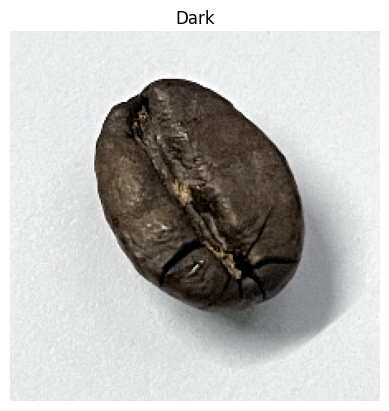

In [ ]:
img = view_random_image(target_dir = "/content/drive/MyDrive/coffee beans image/train/",
                        target_class = "Dark") # or we can write nike instead of converse to see converse examples

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


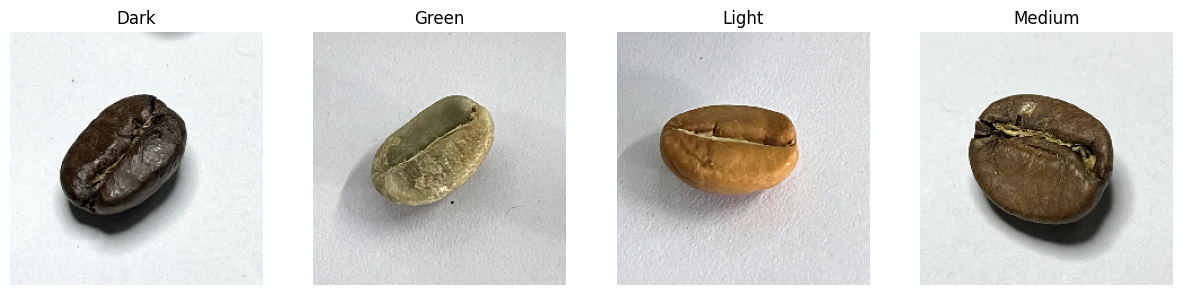

In [ ]:
plt.figure(figsize = (15,7))
plt.subplot(1,4,1)
dark_bean_image = view_random_image("/content/drive/MyDrive/coffee beans image/train/", "Dark")
plt.subplot(1,4,2)
green_bean_image = view_random_image("/content/drive/MyDrive/coffee beans image/train/", "Green")
plt.subplot(1,4,3)
light_bean_image = view_random_image("/content/drive/MyDrive/coffee beans image/train/", "Light")
plt.subplot(1,4,4)
medium_bean_image = view_random_image("/content/drive/MyDrive/coffee beans image/train/", "Medium")

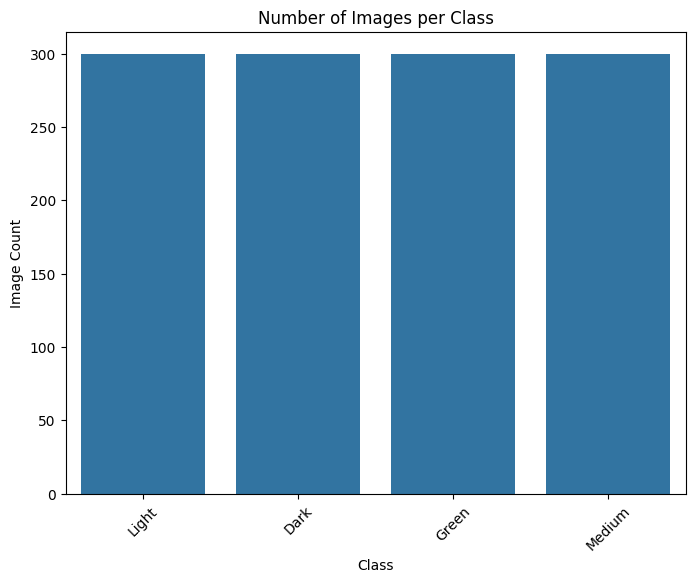

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Path to the training directory
train_dir = "/content/drive/MyDrive/coffee beans image/train/"

# Get the names of the class folders
class_names = os.listdir(train_dir)

# Count the number of images in each class folder
image_counts = {class_name: len(os.listdir(os.path.join(train_dir, class_name)))
                for class_name in class_names}

# Convert the dictionary to a DataFrame for easy plotting
df_counts = pd.DataFrame(list(image_counts.items()), columns=['Class', 'Image Count'])

# Create a countplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Class', y='Image Count', data=df_counts)
plt.title('Number of Images per Class')
plt.ylabel('Image Count')
plt.xlabel('Class')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import os

# Path to the training directory
train_dir = "/content/drive/MyDrive/coffee beans image/train/"

# Loop through each class directory in train_dir
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):  # Ensure it's a directory
        # Count the number of image files in the class directory
        image_count = len([file for file in os.listdir(class_path) if file.endswith(('jpg', 'jpeg', 'png'))])
        print(f"Class: {class_name}, Number of Images: {image_count}")


Class: Light, Number of Images: 300
Class: Dark, Number of Images: 300
Class: Green, Number of Images: 300
Class: Medium, Number of Images: 300


In [ ]:
import tensorflow as tf
img.shape #(width, height, colour channels)

(224, 224, 3)

In [ ]:
import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [ ]:
train_dir = "/content/drive/MyDrive/coffee beans image/train/"
test_dir = "/content/drive/MyDrive/coffee beans image/test/"

In [ ]:
# Rescale
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (224,224),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")

Found 1200 images belonging to 4 classes.
Found 428 images belonging to 4 classes.


In [ ]:
import tensorflow as tf

# 1. Create a base model with tf.keras.applications
base_model = tf.keras.applications.ResNet50V2(include_top=False)

# 2. Freeze the base model
base_model.trainable = False

# 3. Create inputs into models
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input-layer")

# 4. Rescaling
x = tf.keras.layers.Rescaling(1/255.)(inputs)

# 5. Pass the inputs through the base model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. Add Dropout layer to prevent overfitting
x = tf.keras.layers.Dropout(0.5, name="dropout_layer")(x)

# 8. Create the output activation layer
outputs = tf.keras.layers.Dense(4, activation="softmax", name="output-layer")(x)

# 9. Combine the inputs with outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 10. Compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 11. Set up early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3, # Stop after 3 epochs with no improvement
                                                  restore_best_weights=True)

# 12. Train the model with early stopping
history = model_0.fit(train_data,
                      epochs=20,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=int(0.25 * len(test_data)),
                      callbacks=[early_stopping])  # Include early stopping callback


94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 492s 10s/step - accuracy: 0.3980 - loss: 1.6747 - val_accuracy: 0.8750 - val_loss: 0.3891
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 490ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8958 - val_loss: 0.3942
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 71s 339ms/step - accuracy: 0.7959 - loss: 0.5066 - val_accuracy: 0.9375 - val_loss: 0.2201
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 268ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9375 - val_loss: 0.2370
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 354ms/step - accuracy: 0.8750 - loss: 0.3592 - val_accuracy: 0.9773 - val_loss: 0.1327
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 194ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9583 - val_loss: 0.1308
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 28s 197ms/step - accuracy: 0.8971 - loss: 0.2828 - val_accuracy: 0.9896 - val_loss: 0.1348
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9375 - val_loss: 0.1485
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.9322 - loss:

In [ ]:
model_0.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input-layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50v2 (Functional)              │ (None, 7, 7, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_layer (Dropout)              │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output-layer (Dense)                 │ (None, 4)                   │           8,196 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,589,390 (89.99 MB)

 Trainable params: 8,196 (32.02 KB)

 Non-trainable params: 23,564,800 (89.89 MB)

 Optimizer params: 16,394 (64.04 KB)

In [ ]:
model_0.evaluate(test_data)

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step - accuracy: 0.9811 - loss: 0.0883


[0.07994979619979858, 0.985981285572052]

In [ ]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))
  #epochs = range(1, len(loss) + 1)
  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

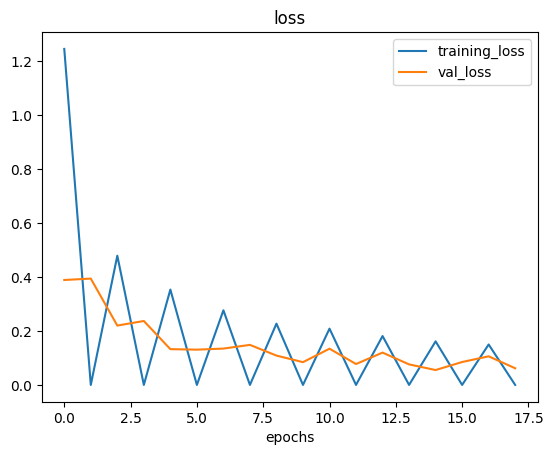

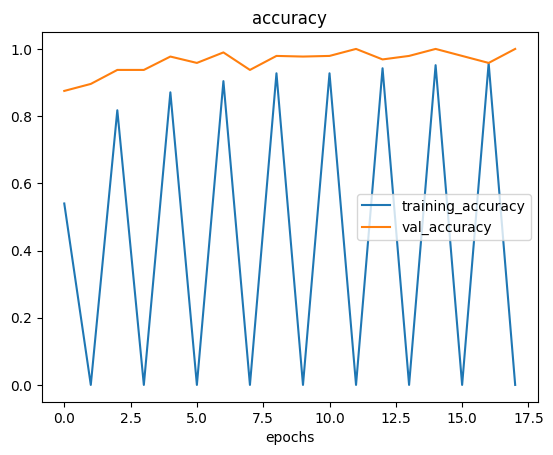

In [ ]:
plot_loss_curves(history)

In [ ]:
2+3

5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


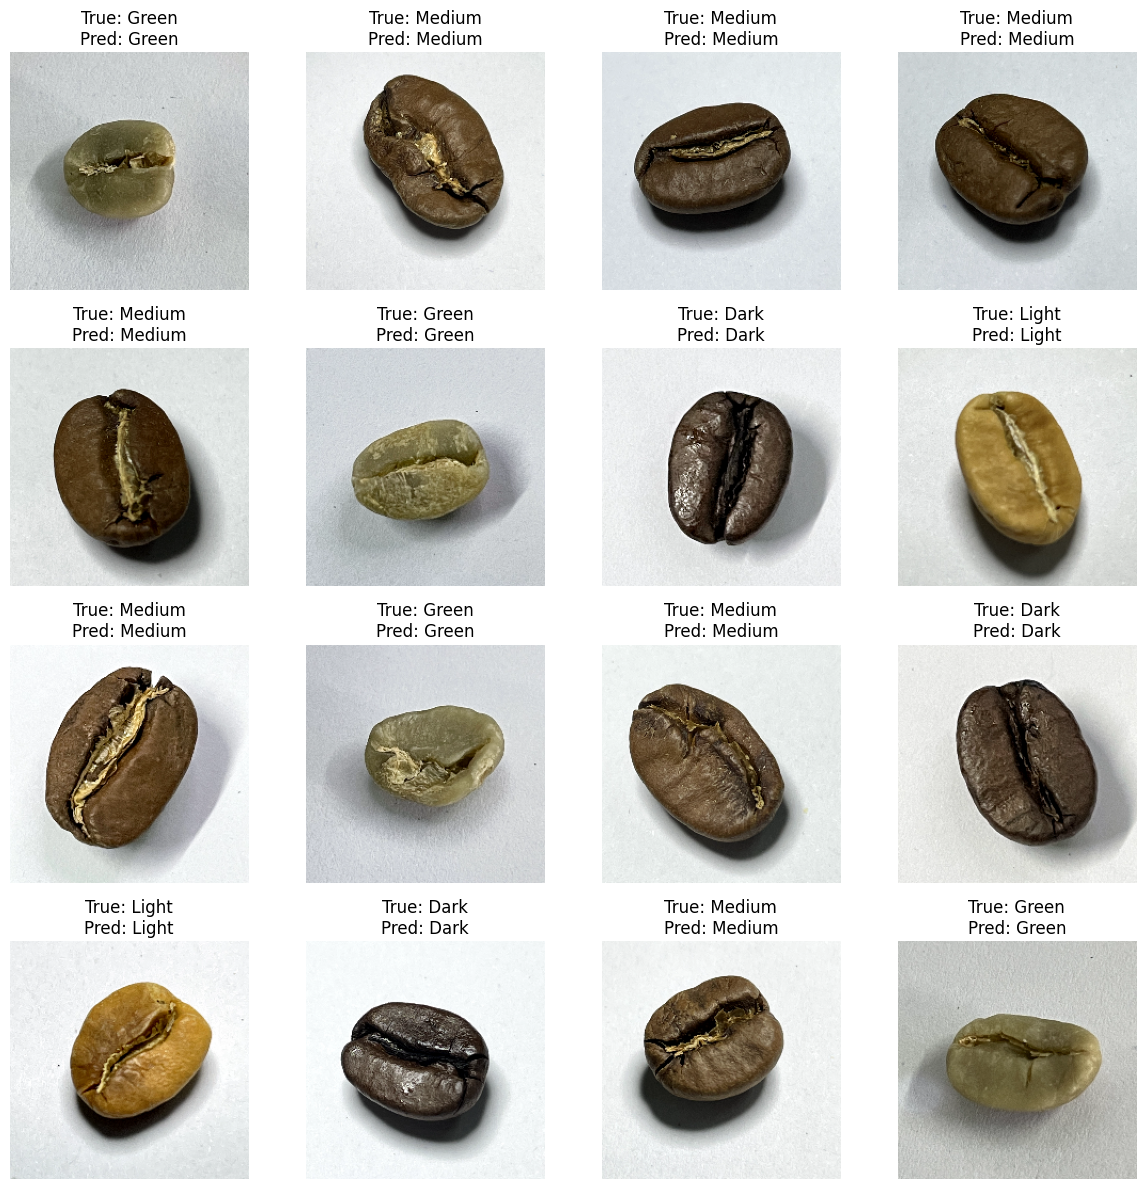

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Class names from the test_data generator
class_names = list(test_data.class_indices.keys())

# Function to display images with their original and predicted labels
def display_predictions(model, test_data, num_images=16):
    # Get a random batch of images and labels from test_data
    img_batch, label_batch = next(test_data)  # Get one batch of test images

    # Select random images from the batch
    random_indices = random.sample(range(len(img_batch)), num_images)

    # Set up the figure for a 4x4 grid
    plt.figure(figsize=(12, 12))

    for idx, i in enumerate(random_indices):
        img = img_batch[i]
        true_label = np.argmax(label_batch[i])  # Get the original class index
        true_class_name = class_names[true_label]

        # Predict the class using the model
        pred_probabilities = model.predict(np.expand_dims(img, axis=0))
        predicted_label = np.argmax(pred_probabilities)  # Get the predicted class index
        predicted_class_name = class_names[predicted_label]

        # Rescale the image for display (values between 0-255)
        img_display = img * 255.0

        # Plot the image with its true and predicted labels
        plt.subplot(4, 4, idx + 1)  # 4x4 grid
        plt.imshow(img_display.astype("uint8"))  # Convert float to uint8 for display
        plt.title(f"True: {true_class_name}\nPred: {predicted_class_name}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Call the function to display predictions on 16 images
display_predictions(model_0, test_data, num_images=16)


In [ ]:
# Save the model weights
model_0.save_weights('model_0_weights.weights.h5')
